# **Encryption using chaos**  
#### Abhishek Anand, Rhishabh Suneeth, Niare Doyom, Shadab Anjum, Lokesh Mishra

## Introduction
As technology progresses and better hardware comes up, so does the need for better security. In today's world data security plays a crucial role in ensuring privacy of users. For a good encryption algorithm, the keys which are used to decrypt must be difficult to find using bruteforce, and values which are close to the original key must not reveal closeness to the original object. In this context, the highly sensitive nature of chaotic maps, ergodicity and high time periodicity can be used as encrypting functions.
In this notebook, we demonstrate encryption of text, images, audio and video using chaos theory. 
## Encryption basics
An **encryption key** is a variable/object which is used to obtain the original object from an encrypted object for a given encryption algorithm. For example, it could be parameters for an encryption function which generates the encrypted object and when applied on the decryption function returns the original object.

In this case, we use chaotic maps as encryption functions and the parameters of these chaotic maps used to generate encrypted object (including the sequences which we will see) will constitute the key in this case.

In the code below, we demonstrate a simple key generator for an object of given size using the encryption function $x=rx(1-x)$ where r is an input parameter 

In [4]:
def keygen(x,r,size):
    key = []
    for i in range(size):
        
        x=r*x*(1-x)
        key.append(int((x* pow(10,16))%256))
    return key

In [5]:
print(keygen(0.001,3.915,10))

[128, 234, 207, 74, 89, 84, 2, 142, 75, 213]


The sequence generated above (along with parameter 'r') comprises of the encryption key. If we know these values, we can obtain back the original object. Let us now move on to image encryption and see how it looks like. In the code below, we demonstrate how we use the keys generated from the keygen function to encrypt image and how we can use the same keys to decrypt the image. In this case encryption is done using the XOR method as shown below. 

In [6]:
# import pykey_gen as kg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [7]:
img = mpimg.imread('suspect_1.jpeg')
height=img.shape[0]
width=img.shape[1]

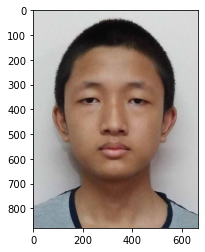

In [8]:
plt.imshow(img)
plt.show()

In [9]:
kg = keygen(0.001,3.95,height*width)
# print(kg)

In [10]:
#Encryption-substitution with XOR

In [11]:
def encryption(img, kg):    
    z=0
    height=img.shape[0]
    width=img.shape[1]
    enimg = np.zeros(shape = [height,width,3], dtype=np.uint8)
    for i in range(height):
        for j in range(width):

            enimg[i,j]=img[i,j]^kg[z]
            z+=1
    return enimg


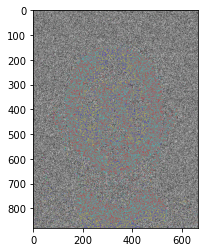

In [12]:
enimg = encryption(img, kg)
plt.imshow(enimg)
plt.show()

In [13]:
plt.imsave('Encryp_Profile_pic.jpeg', enimg)

In [14]:
#Decryption

For decryption note that twice the XOR operation is the same as no operation at all. Hence if we know the keys, we can simply apply the XOR operation again to obtain the original image as shown below.

In [15]:
def decryption(enimg, kg):
    height=enimg.shape[0]
    width=enimg.shape[1]
    z=0
    decimg = np.zeros(shape=[height,width,3], dtype=np.uint8)
    for i in range(height):
        for j in range(width):

            decimg[i,j] = enimg[i,j]^kg[z]
            z+=1
    return decimg

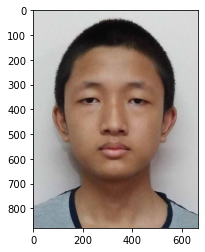

In [16]:
decimg = decryption(enimg, kg)
plt.imshow(decimg)
plt.show()

In [17]:
plt.imsave('Decryp_encry_Profile_pic.jpeg', decimg)

Now that we have seen a simple form of encryption, let us move on to encryption using chaos. In the next section, we will see the chaotic maps that used for generating keys for encryption and their plots

# Chaotic maps in 2D

The proposed maps are as below. In general the maps demonstrate chaotic behavior as we will see in the plots. The plots have been generated using the initial condition $(x_0,y_0)=(0.1,0.1)$ and parameters $\alpha=0.9$, $a=1.4$ and $b=0.3$ for a default size of 1000 keys.

### Finance Map

$y_{n+1}=y_n-\alpha$ tan($x_n$)

$x_{n+1}=$sin($x_n$)$+y_{n+1}$

In [18]:
def finance_map(alpha,initial, size=1000):
    lx=[]
    ly=[]
    lxk=[]
    lyk=[]
    x_prev=initial[0]
    y_prev=initial[1]
    indexx = []
    indexy = []
    i = 0
    for i in range(size):
        y=y_prev-alpha*np.tan(x_prev)
        x=np.sin(x_prev)+y
        lx.append(x)
        ly.append(y)
        lxk.append(int(x*(pow(10,16))%256))
        lyk.append(int(y*(pow(10,16))%256))
        x_prev=x
        y_prev=y
        indexx.append(i)
        indexy.append(i)
        i+=1

    return lxk, lyk, lx, ly, indexx, indexy

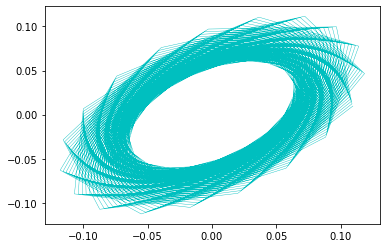

In [19]:
keyx, keyy, lx, ly, indexx, indexy = finance_map(0.9,(0.1,0.1))
plt.plot(lx,ly,'c',linewidth=0.4)
plt.show()

# Modified Logistic Map 

$y_{n+1}=b^2x_n$

$x_{n+1}=x_n^2+y_n^2-a^2$

In [20]:
def modified_logistic_map(a,b,initial,size=1000):
    lx=[]
    ly=[]
    lxk=[]
    lyk=[]
    i = 0
    x_prev=initial[0]
    y_prev=initial[1]
    for i in range(size):
        y=b*b*x_prev
        x=x_prev*x_prev+y_prev*y_prev-a*a
        lx.append(x)
        lxk.append(int(x*(pow(10,16))%256))
        lyk.append(int(y*(pow(10,16))%256))
        ly.append(y)
        x_prev=x
        y_prev=y
        i+=1
        
    
    return lxk, lyk, lx, ly

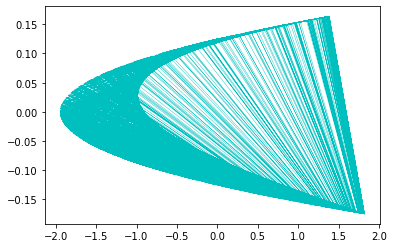

In [21]:
keyx , keyy, lx, ly = modified_logistic_map(1.4,0.3,(0.1,0.1))
plt.plot(lx,ly,'c',linewidth=0.4)
plt.show()

# The eye

$y_{n+1}=$tan($y_n$)-$\alpha$sin($x_n)$

$x_{n+1}=$sin($x_n$)+tan($y_{n+1}$)

In [22]:
def eye_map(alpha,initial, size=1000):
    lx=[]
    ly=[]
    x_prev=initial[0]
    y_prev=initial[1]
    lxk=[]
    lyk=[]
    i = 0
    for i in range(size):
        y=np.tan(y_prev)-alpha*np.sin(x_prev)
        x=np.sin(x_prev)+np.tan(y)
        lx.append(x)
        ly.append(y)
        lxk.append(int(x*(pow(10,16))%256))
        lyk.append(int(y*(pow(10,16))%256))
        x_prev=x
        y_prev=y
        i+=1
    return lxk, lyk, lx, ly

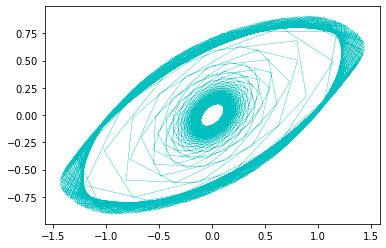

In [23]:
keyx, keyy, lx, ly= eye_map(0.9,(0.1,0.1))
plt.plot(lx,ly,'c',linewidth=0.4)
plt.show()

# Galaxy map

$y_{n+1}=$sin($y_n$)-$\alpha$tan($x_n$)

$x_{n+1}$=tan($x_n$)+sin($y_{n+1}$)

In [24]:
def galaxy_map(alpha,initial, size=1000):
    lx=[]
    ly=[]
    x_prev=initial[0]
    y_prev=initial[1]
    lxk=[]
    lyk=[]
    for i in range(size):
        y=-alpha*np.tan(x_prev)+np.sin(y_prev)
        x=np.sin(y)+np.tan(x_prev)
        lx.append(x)
        ly.append(y)
        lxk.append(int(x*(pow(10,16))%256))
        lyk.append(int(y*(pow(10,16))%256))
        x_prev=x
        y_prev=y
        i+=1
    return lxk, lyk, lx, ly

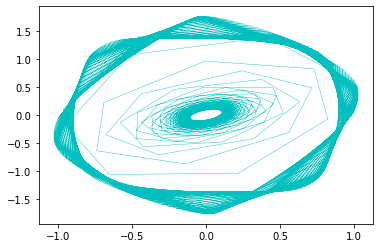

In [25]:
keyx, keyy, lx, ly= galaxy_map(0.9,(0.1,0.1))
plt.plot(lx,ly,'c',linewidth=0.4)
plt.show()

## Text Encryption  
We generate a chaotic key using keygen function defined as given.Then the string to be encrypted is converted to a list.A new list is created with each corresponding element of the new list equal to its unicode using ord function. Then each element of the list is XORed with the random key and then the list is converted back to a string of characters using chr function.

We get the original text by reversing the above steps.

In [46]:
def Encrypt(code):
    
    kg = keygen(0.001,3.915,len(code))


    def Convert(string):
        list1 = []
        list1[:0] = string
        return list1


    # Driver code
    text1 = (Convert(code))
    list1 = [0]*len(code)

    for i in range (0,len(code)):
        list1[i] =  ord (text1[i])

    list2 = [0]*len(code)
    for i in range (0,len(code)):
        list2[i] = list1[i]^kg[i]
   

    list3 = [0]*len(code)
    for i in range (0,len(code)):
        list3[i] = chr(list2[i])

    return list3
def Decrypt(list4):
    kg = keygen(0.001,3.915,len(list4))

    list8 = [0]*len(list4)
    for i in range (0,len(list4)):
        list8[i] = list4[i]
    list5 = [0]*len(list4)
    for i in range (0,len(list8)):
          list5[i] = ord (list8[i])
            
    list6 = [0]*len(list4)
    for i in range (0,len(list4)):
        list6[i] = kg[i]^list5[i]
        
    list7 = [0]*len(list4)
    for i in range (0,len(list4)):
        list7[i] = chr(list6[i])
        
    return("".join(list7))

  
a = input('type the message to be encrypted--  ')
b = Encrypt(a)
print('This is the encrypted message for you')
print(b)
print ('This is the decrypted message for you--  ')
print(Decrypt(b))

### Image encryption using chaos

### Procedure (Part-1)
Next we demonstrate how to encrypt images using the chaotic maps as demonstrated above.
The code below roughly does the following:


* Divide the image into two equal halves
* Generate a set of keys keyx1 and keyy1 for first half of the split image
* Generate set of keys keyx2 and keyy2 for the second half of the split image

Note that the above keys are generated using the chaotic maps as demonstrated above.

Now,
* Permute the 1st half using keyx1 and keyy1
* Permute the 2nd half using keyx2 and keyy2
Hence the chaotic keys above help us to generate a random permutation of the image

In [27]:
# converting image to an array
img = mpimg.imread('suspect_1.jpeg')
height = img.shape[0]
width = img.shape[1]
size = np.size(img)

In [28]:
# dividing the array in 2 parts
img1 = img[0:int(height/2)]
img2 = img[int(height/2)+1:size]

In [29]:
# generating the chaoting sequence

# chaotic sequence 1
keyx1, keyy1, lx1, ly1 = galaxy_map(0.9,(0.1,0.1), max(height, width))

# chaotic sequence 2
keyx2, keyy2, lx2, ly2= eye_map(0.9,(0.1,0.1), max(height, width))

In [30]:
# sorting of keys causing randomization of index

def index_randomizer(k):
    index = list(range(len(k)))
    k,index=(list(t) for t in zip(*sorted(zip(k, index))))
    return index

In [31]:
# keys for img1
keyx1 = keyx1[0:img1.shape[1]]
keyy1 = keyy1[0:img1.shape[0]]
# keys for img2
keyx2 = keyx2[0:img2.shape[1]]
keyy2 = keyy2[0:img2.shape[0]]

# img1
indexx1 = index_randomizer(keyx1)
indexy1 = index_randomizer(keyy1)
# img2
indexx2 = index_randomizer(keyx2)
indexy2 = index_randomizer(keyy2)

In [32]:
# Given first half of the image first apply x permutation then apply y permutation

def shuffleimg(img, indexx, indexy):
    x = len(indexy)
    y = len(indexx)
    encimg1 = np.zeros(shape=[x,y,3], dtype=np.uint8)
    encimg2 = np.zeros(shape=[x,y,3], dtype=np.uint8)
    # x permutation
    for i in range(x):
        for j in range(y):
            encimg1[i][j]=img[i][indexx[j]]
    # y permutation
    for i in range(y):
        for j in range(x):
            encimg2[j][i]=encimg1[indexy[j]][i]

    return encimg2

In [29]:
encimg1 = shuffleimg(img1, indexx1, indexy1)
encimg2 = shuffleimg(img2, indexx2, indexy2)

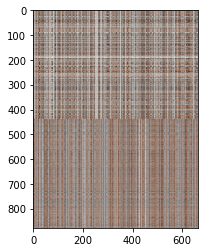

In [30]:
encimg = np.concatenate((encimg1, encimg2))
plt.imshow(encimg)
plt.show()

### Procedure 2 Diffusion
1. Create a new chaotic sequence of keys
2. Apply XOR using the keys on each pixel

In [31]:
keyx3, keyy3, lx3, ly3 = modified_logistic_map(1.4,0.3,(0.1,0.1), encimg.size)

In [32]:
encimg2 = encryption(encimg, keyx3)
encimg2 = encryption(encimg2, keyy3)

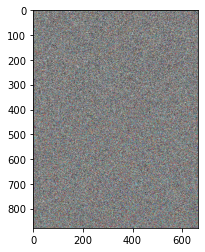

Wall time: 273 ms


In [33]:
%%time
plt.imshow(encimg2)
plt.show()

# Image Decryption in 2D

For decryption we follow the inverse procedure using the same keys to get the original image. First we apply the XOR operation again to restore the effects of diffusion.

In [34]:
decimg = decryption(encimg2, keyy3)
decimg = decryption(decimg, keyx3)

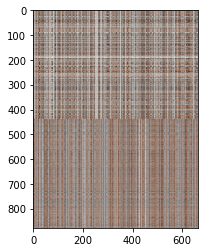

In [35]:
plt.imshow(decimg)
plt.show()

### Procedure for reverse permutation
We follow the same procedure for encryption in reverse order to get back the original image 

In [36]:
decimg1 = decimg[0:int(height/2)]
decimg2 = decimg[int(height/2):size]

In [37]:
def reverseShuffleimg(img, indexx, indexy):
    x = len(indexy)
    y = len(indexx)
    encimg1 = np.zeros(shape=[x,y,3], dtype=np.uint8)
    encimg2 = np.zeros(shape=[x,y,3], dtype=np.uint8)
    # y permutation
    for i in range(y):
        for j in range(x):
            encimg1[indexy[j]][i]=img[j][i]
    # x permutation
    for i in range(x):
        for j in range(y):
            encimg2[i][indexx[j]]=encimg1[i][j]

    return encimg2

In [38]:
decimg1 = reverseShuffleimg(decimg1, indexx1, indexy1)
decimg2 = reverseShuffleimg(decimg2, indexx2, indexy2)

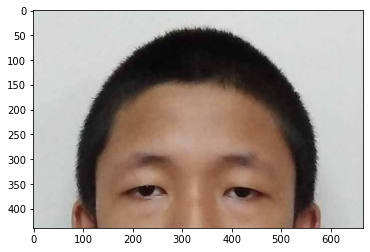

In [40]:
plt.imshow(decimg1)

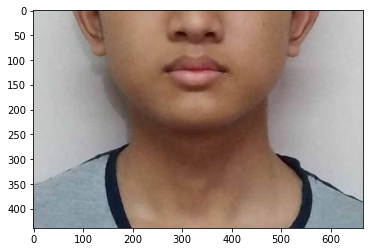

In [39]:
plt.imshow(decimg2)

In [41]:
decimg3 = np.concatenate((decimg1, decimg2))

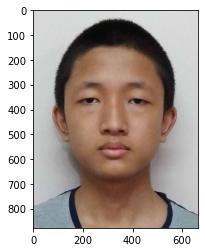

Wall time: 237 ms


In [42]:
%%time
plt.imshow(decimg3)
plt.show()


# Audio encryption

In [43]:
from scipy.io.wavfile import read
import numpy as np
a=read("mogambo.wav")
a= np.array(a[1])
print(a)

[[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [-1 -1]
 [ 1  3]
 [ 0 -3]]


In [44]:
def shuffle_audio(a,indexx,indexy):
#     ans=np.zeros((a.shape[0],a.shape[1]),dtype=np.uint8)
#     #column permutation
#     #print(indexx)
#     for i in range(a.shape[0]):
#         ans[i,:]=a[i,indexx]
        
#     #row permutation
#     for i in range(a.shape[1]):
#         ans[:,i]=ans[indexy,i]
#     return ans
    x = len(indexy)
    y = len(indexx)
    encimg1 = np.zeros(shape=[x,y], dtype=np.uint16)
    encimg2 = np.zeros(shape=[x,y], dtype=np.uint16)
    # x permutation
    for i in range(x):
        for j in range(y):
            encimg1[i][j]=a[i][indexx[j]]
    # y permutation
    for i in range(y):
        for j in range(x):
            encimg2[j][i]=encimg1[indexy[j]][i]

    return encimg2

def reverseShuffleAudio(a,indexx,indexy):
    x = len(indexy)
    y = len(indexx)
    encimg1 = np.zeros(shape=[x,y], dtype=np.uint16)
    encimg2 = np.zeros(shape=[x,y], dtype=np.uint16)
    # y permutation
    for i in range(y):
        for j in range(x):
            encimg1[indexy[j]][i]=a[j][i]
    # x permutation
    for i in range(x):
        for j in range(y):
            encimg2[i][indexx[j]]=encimg1[i][j]

    return encimg2

def audio_encrypt(a,method):
    keyx1, keyy1, lx1, ly1 = method[0](0.9,(0.1,0.1),max(a.shape[0],a.shape[1]))
    indexx1 = index_randomizer(keyx1[0:a.shape[1]])
    indexy1 = index_randomizer(keyy1[0:a.shape[0]])
    ans=shuffle_audio(a,indexx1,indexy1)
    #keyx3, keyy3, lx3, ly3 = method[1](0.3,(0.1,0.1), a.size)
    #print(np.array(keyx3).shape)
#     a=encryption(a,keyx3)
#     a=encryption(a,keyy3)
    return ans

def audio_decrypt(a,method):
    keyx1, keyy1, lx1, ly1 = method[0](0.9,(0.1,0.1),(max(a.shape[0], a.shape[1])))
    indexx1 = np.array(index_randomizer(keyx1[0:a.shape[1]]))
    indexy1 = np.array(index_randomizer(keyy1[0:a.shape[0]]))
    #print("decrypt index",indexy1)
    ans = reverseShuffleAudio(a, indexx1, indexy1)
    keyx3, keyy3, lx3, ly3 = np.array(method[1](0.3,(0.1,0.1), a.size))
    #a=decryption(a,keyx3)
    #a=decryption(a,keyy3)
    return ans


In [45]:
import IPython
w=IPython.display.Audio("mogambo.wav",autoplay=True)
display(w)

In [46]:
import IPython
from scipy.io.wavfile import write
samplerate = 44100; fs = 100
# t = np.linspace(0., 1., samplerate)
# amplitude = np.iinfo(np.int16).max
data_new = audio_encrypt(a,(eye_map,galaxy_map))
data_d=audio_decrypt(data_new,(eye_map,galaxy_map))
write("mogambo1.wav", samplerate, data_new.astype(np.int16))
w=IPython.display.Audio("mogambo1.wav",autoplay=True)
display(w)

In [47]:
write("demogambo1.wav", samplerate, data_d.astype(np.int16))
w=IPython.display.Audio("demogambo1.wav",autoplay=True)
display(w)

# Conclusion
In this paper, we looked at the the applications of chaos theory on encryption using chaotic maps such as eye, galaxy, finance map and the modified logistic map. We also saw the behaviour of these maps through phase plots. Such chaotic maps have ideal properties like sensitivity to initial conditions which can be used to make good encryption algorithms. We alse tried to demonstrate chaotic encryption for text, audio and images. However, our code for decryption for videos did not come out as expected.

# Video Encryption:

## Capturing Image Frames:

In [49]:
# Importing all necessary libraries
import cv2
import os
  
# Read the video from specified path
cam = cv2.VideoCapture("thanos_1.mp4")
  
try:
      
    # creating a folder named data
    if not os.path.exists('data_thanos'):
        os.makedirs('data_thanos')
  
 # if not created then raise error
except OSError:
    print ('Error: Creating directory of data')
  
 # frame
currentframe = 0

while(True):
      
    # reading from frame
    ret,frame = cam.read()
    
    if ret:
        # if video is still left continue creating images
        name = './data_thanos/' + str(currentframe)+'.jpeg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  
 # Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../data_thanos/0.jpeg
Creating..../data_thanos/1.jpeg
Creating..../data_thanos/2.jpeg
Creating..../data_thanos/3.jpeg
Creating..../data_thanos/4.jpeg
Creating..../data_thanos/5.jpeg
Creating..../data_thanos/6.jpeg
Creating..../data_thanos/7.jpeg
Creating..../data_thanos/8.jpeg
Creating..../data_thanos/9.jpeg
Creating..../data_thanos/10.jpeg
Creating..../data_thanos/11.jpeg
Creating..../data_thanos/12.jpeg
Creating..../data_thanos/13.jpeg
Creating..../data_thanos/14.jpeg
Creating..../data_thanos/15.jpeg
Creating..../data_thanos/16.jpeg
Creating..../data_thanos/17.jpeg
Creating..../data_thanos/18.jpeg
Creating..../data_thanos/19.jpeg
Creating..../data_thanos/20.jpeg
Creating..../data_thanos/21.jpeg
Creating..../data_thanos/22.jpeg
Creating..../data_thanos/23.jpeg
Creating..../data_thanos/24.jpeg
Creating..../data_thanos/25.jpeg
Creating..../data_thanos/26.jpeg
Creating..../data_thanos/27.jpeg
Creating..../data_thanos/28.jpeg
Creating..../data_thanos/29.jpeg
Creating..../data_th

## Extracting Audio from Video:

In [50]:
import moviepy.editor as mp
  
# Insert Local Video File Path 
clip = mp.VideoFileClip(r"thanos_1.mp4")
  
# Insert Local Audio File Path
clip.audio.write_audiofile(r"thanos_1_voice.mp3")

MoviePy - Writing audio in thanos_1_voice.mp3


MoviePy - Done.


### Convert image frames to Arrays

In [51]:
import matplotlib.image as mpimg

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

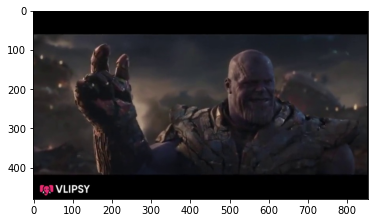

In [52]:
v=load_images('data_thanos')
v=np.array(v)
plt.imshow(v[150])
plt.show()

## Encryption using Permutation and Diffusion:

In [53]:
from PIL import Image
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# chaotic sequence 1
keyx1, keyy1, lx1, ly1 = galaxy_map(0.9,(0.1,0.1), max(height, width))

# chaotic sequence 2
keyx2, keyy2, lx2, ly2= eye_map(0.9,(0.1,0.1), max(height, width))
keyx3, keyy3, lx3, ly3 = modified_logistic_map(1.4,0.3,(0.1,0.1), height*width)
try:
      
# creating a folder named data
    if not os.path.exists('encrypted_thanos'):
        os.makedirs('encrypted_thanos')

# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')

for i in range(248):
    
    size = np.size(v[i])
    height = v[i].shape[0]
    width = v[i].shape[1]
    # generating the chaoting sequence

    img1 = v[i][0:int(height/2)]
    img2 = v[i][int(height/2):size]
    # keys for img1
    keyx1 = keyx1[0:img1.shape[1]]
    keyy1 = keyy1[0:img1.shape[0]]
    # keys for img2
    keyx2 = keyx2[0:img2.shape[1]]
    keyy2 = keyy2[0:img2.shape[0]]

    # img1
    indexx1 = index_randomizer(keyx1)
    indexy1 = index_randomizer(keyy1)
    # img2
    indexx2 = index_randomizer(keyx2)
    indexy2 = index_randomizer(keyy2)
    # Given first half of the image first apply x permutation then apply y permutation
    encimg1 = shuffleimg(img1, indexx1, indexy1)
    encimg2 = shuffleimg(img2, indexx2, indexy2)
    encimg = np.concatenate((encimg1, encimg2))
#     plt.imshow(encimg)
#     plt.show()
#     keyx3, keyy3, lx3, ly3 = modified_logistic_map(1.4,0.3,(0.1,0.1), encimg.size)
    encimg2 = encryption(encimg, keyx3)
    encimg2 = encryption(encimg2, keyy3)
#     plt.imshow(encimg2)
#     plt.show()
    
    
    im = Image.fromarray(encimg2)
    im.save('C:/Users/anand/encrypt_thanos/'+str(i) + '.jpeg')
#     "C:/Users/anand/encrypted_thanos" 

## Audio Encryption of extracted audio from video:

In [54]:
from scipy.io.wavfile import read
import numpy as np
a=read("thanos1.wav")
a= np.array(a[1])
# print(a)
print(a.shape)

(369792, 2)


In [55]:
#original audio
import IPython
w=IPython.display.Audio("thanos1.wav",autoplay=True)
display(w)

In [56]:
import IPython
from scipy.io.wavfile import write
samplerate = 44100; fs = 100
# t = np.linspace(0., 1., samplerate)
# amplitude = np.iinfo(np.int16).max
data_new = audio_encrypt(a,(eye_map,galaxy_map))
data_d=audio_decrypt(data_new,(eye_map,galaxy_map))

#audio encryption
write("thanos2.wav", samplerate, data_new.astype(np.int16))
w=IPython.display.Audio("thanos2.wav",autoplay=True)
display(w)

## Merging audio and image frames to form an encrypted video:

In [57]:
import os
from PIL import Image
import cv2 
os.chdir("C:/Users/anand/encrypt_thanos")  
path = "C:/Users/anand/encrypt_thanos"
# Get list of all files in a given directory sorted by name
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(path, x)),
                        os.listdir(path) ) )
mean_height = 0
mean_width = 0
  
num_of_images = len(os.listdir('.'))
# print(num_of_images)
for file in list_of_files:
    im = Image.open(os.path.join(path, file))
    width, height = im.size
    mean_width += width
    mean_height += height
mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)
  
for file in list_of_files:
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        # opening image using PIL Image
        im = Image.open(os.path.join(path, file)) 

        # im.size includes the height and width of image
        width, height = im.size   
        print(width, height)

        # resizing 
        imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS) 
        imResize.save( file, 'JPEG', quality = 95) # setting quality
        # printing each resized image name
        print(im.filename.split('\\')[-1], " is resized")

def generate_video():
    image_folder = '.' # make sure to use your folder
    video_name = 'encryptvideo_thanos.mp4'
    os.chdir("C:/Users/anand/encrypt_thanos")
    images = [img for img in os.listdir(image_folder)
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")]
     
    # Array images should only consider
    # the image files ignoring others if any
    images=sorted([int(x[:-5]) for x in images])
    images=[str(x)+'.jpeg' for x in images]
#     images=[x+'.jpeg' for x in images]
    print(images)
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    
    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape  
  
    video = cv2.VideoWriter(video_name, 0, 30, (width, height)) 
  
     #Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 
      
    # Deallocating memories taken for window creation
    cv2.destroyAllWindows() 
    video.release()  # releasing the video generated
  
  
 # Calling the generate_video function
generate_video()

854 480
0.jpeg  is resized
854 480
1.jpeg  is resized
854 480
10.jpeg  is resized
854 480
100.jpeg  is resized
854 480
101.jpeg  is resized
854 480
102.jpeg  is resized
854 480
103.jpeg  is resized
854 480
104.jpeg  is resized
854 480
105.jpeg  is resized
854 480
106.jpeg  is resized
854 480
107.jpeg  is resized
854 480
108.jpeg  is resized
854 480
109.jpeg  is resized
854 480
11.jpeg  is resized
854 480
110.jpeg  is resized
854 480
111.jpeg  is resized
854 480
112.jpeg  is resized
854 480
113.jpeg  is resized
854 480
114.jpeg  is resized
854 480
115.jpeg  is resized
854 480
116.jpeg  is resized
854 480
117.jpeg  is resized
854 480
118.jpeg  is resized
854 480
119.jpeg  is resized
854 480
12.jpeg  is resized
854 480
120.jpeg  is resized
854 480
121.jpeg  is resized
854 480
122.jpeg  is resized
854 480
123.jpeg  is resized
854 480
124.jpeg  is resized
854 480
125.jpeg  is resized
854 480
126.jpeg  is resized
854 480
127.jpeg  is resized
854 480
128.jpeg  is resized
854 480
129.jpeg  is 

In [58]:
from moviepy.editor import VideoFileClip, AudioFileClip, CompositeAudioClip
# load the video
video_clip = VideoFileClip("C:/Users/anand/encrypt_thanos/encryptvideo_thanos.mp4")
# load the audio
audio_clip = AudioFileClip("C:/Users/anand/thanos2.wav")
# use the volume factor to increase/decrease volume
audio_clip = audio_clip.volumex(1)
final_audio = audio_clip
final_clip = video_clip.set_audio(final_audio)

# save the final clip
final_clip.write_videofile("final_thanos_video.mp4")

Moviepy - Building video final_thanos_video.mp4.
MoviePy - Writing audio in final_thanos_videoTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video final_thanos_video.mp4



Moviepy - Done !
Moviepy - video ready final_thanos_video.mp4


### Open drive link to run encrypted video

## Decrypting the Encrypted video file:

### Audio Decrypting:

In [59]:
write("dethanos1.wav", samplerate, data_d.astype(np.int16))
w=IPython.display.Audio("dethanos1.wav",autoplay=True)
display(w)

### Image Decryption:

In [60]:
from PIL import Image
import matplotlib as mpl
import cv2
# from google.patches import cv2_imshow
mpl.rcParams['agg.path.chunksize'] = 10000

# chaotic sequence 1
keyx1, keyy1, lx1, ly1 = galaxy_map(0.9,(0.1,0.1), max(height, width))

# chaotic sequence 2
keyx2, keyy2, lx2, ly2= eye_map(0.9,(0.1,0.1), max(height, width))
keyx3, keyy3, lx3, ly3 = modified_logistic_map(1.4,0.3,(0.1,0.1), height*width)
try:
      
# creating a folder named data
    if not os.path.exists('encrypt_thanos'):
        os.makedirs('encrypt_thanos')

# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')
    
i=0

os.chdir("C:/Users/anand/encrypt_thanos")  
path = "C:/Users/anand/encrypt_thanos"
# Get list of all files in a given directory sorted by name
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(path, x)),
                        os.listdir(path) ) )


im1 = np.array(Image.open(os.path.join(path, list_of_files[0]))) 
x = im1.shape[0]
y = im1.shape[1]
v=np.zeros(shape=[249,x,y,3], dtype=np.uint8)

for file in list_of_files:
     if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        # opening image using PIL Image
        im = cv2.imread(os.path.join(path,file),1) 
        im=np.array(im)
        size = np.size(im)

        img1 = im[0:int(height/2)]
        img2 = im[int(height/2):size]
        # keys for img1
        keyx1 = keyx1[0:img1.shape[1]]
        keyy1 = keyy1[0:img1.shape[0]]
         # keys for img2
        keyx2 = keyx2[0:img2.shape[1]]
        keyy2 = keyy2[0:img2.shape[0]]

        # img1
        indexx1 = index_randomizer(keyx1)
        indexy1 = index_randomizer(keyy1)
        # img2
        indexx2 = index_randomizer(keyx2)
        indexy2 = index_randomizer(keyy2)

        decimg = decryption(im, keyy3)
        decimg = decryption(decimg, keyx3)
        #         print(decimg)
        height = im.shape[0]
        width = im.shape[1]
        # generating the chaoting sequence
        decimg1 = decimg[0:int(height/2)]
        decimg2 = decimg[int(height/2):size]
        #         plt.imshow(decimg)
        #         plt.show()


        # Given first half of the image first apply x permutation then apply y permutation
        decimg1 = reverseShuffleimg(decimg1, indexx1, indexy1)
        decimg2 = reverseShuffleimg(decimg2, indexx2, indexy2)
        decimg3 = np.concatenate((decimg1, decimg2))
        #     plt.imshow(encimg)
        #     plt.show()
        #     keyx3, keyy3, lx3, ly3 = modified_logistic_map(1.4,0.3,(0.1,0.1), encimg.size)
        #         print(decimg3.shape)
#         plt.imshow(decimg3)
#         plt.show()
        v[i,:,:,:]=im
        im = Image.fromarray(decimg3)
        im.save('C:/Users/anand/encrypted_thanos_video/'+str(i) + '.jpeg')
        i=i+1
        #         #     "C:/Users/anand/encrypted_thanos" 

### Merging decrypted audio and decrypted image frames to form an decrypted video:

In [61]:
import os
from PIL import Image
import cv2 
os.chdir("C:/Users/anand/encrypted_thanos_video")  
path = "C:/Users/anand/encrypted_thanos_video"
# Get list of all files in a given directory sorted by name
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(path, x)),
                        os.listdir(path) ) )
mean_height = 0
mean_width = 0
  
num_of_images = len(os.listdir('.'))
# print(num_of_images)
for file in list_of_files:
    im = Image.open(os.path.join(path, file))
    width, height = im.size
    mean_width += width
    mean_height += height
mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)
  
for file in list_of_files:
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        # opening image using PIL Image
        im = Image.open(os.path.join(path, file)) 

        # im.size includes the height and width of image
        width, height = im.size   
        print(width, height)

        # resizing 
        imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS) 
        imResize.save( file, 'JPEG', quality = 95) # setting quality
        # printing each resized image name
        print(im.filename.split('\\')[-1], " is resized")

def generate_video():
    image_folder = '.' # make sure to use your folder
    video_name = 'finalencryptvideo_thanos.mp4'
    os.chdir("C:/Users/anand/encrypted_thanos_video")
    images = [img for img in os.listdir(image_folder)
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")]
     
    # Array images should only consider
    # the image files ignoring others if any
    images=sorted([int(x[:-5]) for x in images])
    images=[str(x)+'.jpeg' for x in images]
#     images=[x+'.jpeg' for x in images]
    print(images)
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    
    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape  
  
    video = cv2.VideoWriter(video_name, 0, 30, (width, height)) 
  
     #Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 
      
    # Deallocating memories taken for window creation
    cv2.destroyAllWindows() 
    video.release()  # releasing the video generated
  
  
 # Calling the generate_video function
generate_video()

854 480
0.jpeg  is resized
854 480
1.jpeg  is resized
854 480
10.jpeg  is resized
854 480
100.jpeg  is resized
854 480
101.jpeg  is resized
854 480
102.jpeg  is resized
854 480
103.jpeg  is resized
854 480
104.jpeg  is resized
854 480
105.jpeg  is resized
854 480
106.jpeg  is resized
854 480
107.jpeg  is resized
854 480
108.jpeg  is resized
854 480
109.jpeg  is resized
854 480
11.jpeg  is resized
854 480
110.jpeg  is resized
854 480
111.jpeg  is resized
854 480
112.jpeg  is resized
854 480
113.jpeg  is resized
854 480
114.jpeg  is resized
854 480
115.jpeg  is resized
854 480
116.jpeg  is resized
854 480
117.jpeg  is resized
854 480
118.jpeg  is resized
854 480
119.jpeg  is resized
854 480
12.jpeg  is resized
854 480
120.jpeg  is resized
854 480
121.jpeg  is resized
854 480
122.jpeg  is resized
854 480
123.jpeg  is resized
854 480
124.jpeg  is resized
854 480
125.jpeg  is resized
854 480
126.jpeg  is resized
854 480
127.jpeg  is resized
854 480
128.jpeg  is resized
854 480
129.jpeg  is 

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'list'

In [ ]:
from moviepy.editor import VideoFileClip, AudioFileClip, CompositeAudioClip
# load the video
video_clip = VideoFileClip("C:/Users/anand/encrypted_thanos_video/finalencryptvideo_thanos.mp4")
# load the audio
audio_clip = AudioFileClip("C:/Users/anand/dethanos1.wav")

In [ ]:
# use the volume factor to increase/decrease volume
audio_clip = audio_clip.volumex(1)

In [ ]:
final_audio = audio_clip
final_clip = video_clip.set_audio(final_audio)

In [ ]:
# save the final clip
final_clip.write_videofile("decrypt_final_thanos_video.mp4")

### Perfomance Analysis:


#### Performance analysis of Encrypting Methods
The parameter here we are using to determine the performance is the algorithm's speed to encrypt/decrypt data blocks of various sizes. During Encryption, we are generating the key and then using the shuffle function to encrypt it. And for decryption, we are using the reverseshuffle function. For eye_map, galaxy_map and modified_logistic function, time complexity for generating the key is O(n). And for shuffle function, time complexity is O(n^2). Also for reverseShuffle, time complexity is O(n^2)

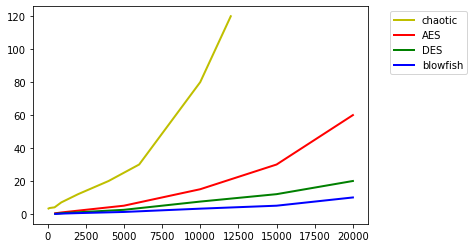

In [2]:
import matplotlib.pyplot as plt
lok=[64.9,138,459,900,2000,4000,6000,8000,10000,12000]
pol=[3.29,3.6,4,7,12,20,30,55,80,120]
lok1=[500,1000,2000,5000,10000,15000,20000]
pol1=[0.01,0.23,0.5,1.2,3.2,5,10]
plt.plot(lok,pol,'y',linewidth=2,label="chaotic")


pol2=[0.1,0.5,1,2.5,7.5,12,20]


pol3=[0.4,1,2,5,15,30,60]
plt.plot(lok1,pol3,'r',linewidth=2,label="AES")
plt.plot(lok1,pol2,'g',linewidth=2,label="DES")
plt.plot(lok1,pol1,'b',linewidth=2,label="blowfish")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()